In [ ]:
# Задача 1.
# Даны значения величины заработной платы заемщиков банка (zp) 
# и значения их поведенческого кредитного скоринга (ks):
# zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
# ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
# Используя математические операции, посчитать коэффициенты линейной регрессии, 
# приняв за X заработную плату (то есть, zp - признак), 
# а за y - значения скорингового балла (то есть, ks - целевая переменная). 
# Произвести расчет как с использованием intercept, так и без.

In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as  plt

In [10]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
print(zp)
print(ks)

[ 35  45 190 200  40  70  54 150 120 110]
[401 574 874 919 459 739 653 902 746 832]


In [11]:
# Проверим условия применения линейной регрессии:
# 1. Наличие линейной зависиимости
# 2. Независимость остатков
# 3. Для любого значения x  значение зависимой переменной распределено нормально
# 4. Гомоскедастичность
# 

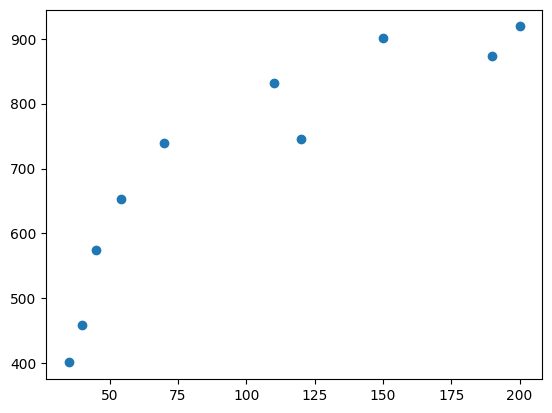

In [12]:
# Построим график ks(zp) для выявления линейной зависимости, независимости остатков и гомоскедастичности.
plt.scatter(zp, ks);

In [13]:
# Наблюдаем "примерно" линейную зависимость.

In [14]:
n = len(zp)
n

10

In [15]:
b1 = (n * np.sum(ks * zp) - np.sum(zp) * np.sum(ks))/( n* np.sum(zp**2) - np.sum(zp)**2)
b1

2.6205388824027653

In [17]:
b0 = np.mean(ks) - b1 * np.mean(zp)
b0

444.17735732435955

In [18]:
ks_pred = b0 + b1 * zp
ks_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [19]:
resid = ks - ks_pred
resid

array([-134.89621821,   11.89839297,  -68.07974498,  -49.2851338 ,
        -89.99891262,  111.38492091,   67.31354303,   64.74181032,
        -12.64202321,   99.56336561])

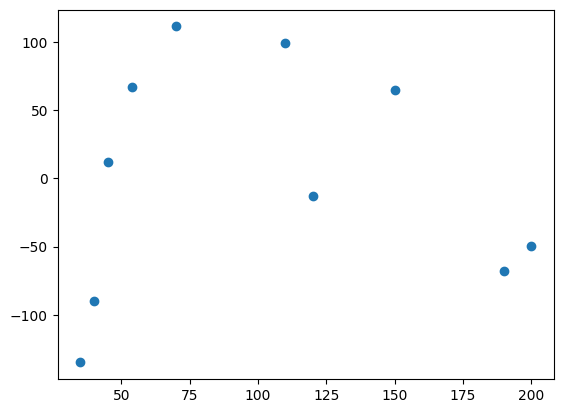

In [20]:
plt.scatter(zp, resid)

In [ ]:
# Никаких закономерностей в распределении остатков не наблюдается

In [22]:
# Проверим распределение остатков методом Шапиро
stats.shapiro(resid)

ShapiroResult(statistic=0.9479533433914185, pvalue=0.6443524360656738)

In [ ]:
# Значение статистики и p-value (при уровне ошибки 0,05) говорит в пользу принятия нулевой гипотезы
# => остатки распределены нормально

In [ ]:
#Задача 2
# Посчитать коэффициент линейной регрессии при заработной плате (zp), 
# используя градиентный спуск (без intercept).

In [41]:
def mse_(b1, x, y, n):
    return np.sum((b1 * x - y))**2/ n
alpha = 1e-7
b1 = 6
n = len(zp)
for i in range(100):
    b1 -= alpha * (2/n) * np.sum((b1 * zp) - ks * zp)
    if i % 1 == 0:
        print(f'Итерация {i}, b1={b1}, mse = {mse_(b1, zp, ks, len(zp))}, diff(mse) = {(2/n) * np.sum((b1 * zp) - ks * zp)}' )
    

Итерация 0, b1=6.01610666, mse = 99733.74681522549, diff(mse) = -161063.33356935202
Итерация 1, b1=6.032212993356936, mse = 96498.4065494259, diff(mse) = -161060.06720494723
Итерация 2, b1=6.048319000077431, mse = 93316.4759556866, diff(mse) = -161056.8009067843
Итерация 3, b1=6.064424680168109, mse = 90187.95178724625, diff(mse) = -161053.53467486193
Итерация 4, b1=6.080530033635595, mse = 87112.83079749724, diff(mse) = -161050.2685091787
Итерация 5, b1=6.096635060486513, mse = 84091.10973998542, diff(mse) = -161047.00240973337
Итерация 6, b1=6.112739760727486, mse = 81122.78536841032, diff(mse) = -161043.7363765245
Итерация 7, b1=6.1288441343651385, mse = 78207.85443662503, diff(mse) = -161040.47040955076
Итерация 8, b1=6.144948181406094, mse = 75346.3136986362, diff(mse) = -161037.20450881086
Итерация 9, b1=6.161051901856975, mse = 72538.15990860401, diff(mse) = -161033.93867430344
Итерация 10, b1=6.177155295724406, mse = 69783.38982084255, diff(mse) = -161030.67290602712
Итерация 1

In [ ]:
# минимальное значение функции потерь достигается на
# Итерация 61, b1=6.99799548842137, mse = 0.9196509558116117, diff(mse) = -160864.20651494816
# но почему то производня от функции потерь не меняет знак при достижении функцией потерь минимума.
# Не удалось разобраться.

In [ ]:
# Задача 3.
# Произвести вычисления как в пункте 2, но с вычислением intercept.
# Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно 
# (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).
